In [57]:
import pandas as pd
from scipy.stats import binom_test, fisher_exact
from genepy.utils import helper as h 
from genepy.imaging import fish
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import fisher_exact, chi2_contingency, ttest_ind, norm
from scipy.spatial import distance_matrix
import numpy as np

%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


## Processing the data

In [2]:
project='FishSuperResColoc'
version='v2'

In [3]:
rename = {
"Text Between Delimiters":"subset",
"Folder Short":"folder_short",
"Folder Path":"folder",
"Source.Name":"name",
"ImageDocumentName::Image Name":"image",
"ParentID::ID of the parent!!I":"parent_id",
"ID::ID!!I":"id",
"RegionsCount::Count!!I": "count",
"ImageSceneName::Image Scene Name ":"scene",
"Area1::Area Unscaled!!R":"area_u",
"Area::Area!!R": "area",
"CenterX1::Center X Unscaled!!R":"x",
"CenterY1::Center Y Unscaled!!R":"y",
"ImageScaleX::Image Scale X!!R":"scale_x",
"ImageScaleY::Image Scale Y!!R":"scale_y",
"ImageIndexZ::Image Index Z!!I":"z",
'Classes 5 RegionsCount ::Classes 5 Count!!I':"count_red",
'Classes 9 RegionsCount ::Classes 9 Count!!I':"count_green",
"ClassColorName::Region Class Color Name": "class",
"IntensityMaximum_TV1-T1-SR::Intensity Maximum of channel 'TV1-T1-SR'!!R":"max_red",
"IntensityMaximum_TV2-T1-SR::Intensity Maximum of channel 'TV2-T1-SR'!!R":"max_tv2_t1",
"IntensityMaximum_TV2-T2-SR::Intensity Maximum of channel 'TV2-T2-SR'!!R":"max_green",
"IntensityMaximum_TV2-T3-SR::Intensity Maximum of channel 'TV2-T3-SR'!!R":"max_dapi",
"IntensityMean_TV1-T1-SR::Intensity Mean Value of channel 'TV1-T1-SR'!!R":"mean_red",
"IntensityMean_TV2-T1-SR::Intensity Mean Value of channel 'TV2-T1-SR'!!R":"mean_tv2_t1",
"IntensityMean_TV2-T2-SR::Intensity Mean Value of channel 'TV2-T2-SR'!!R":"mean_green",
"IntensityMean_TV2-T3-SR::Intensity Mean Value of channel 'TV2-T3-SR'!!R":"mean_dapi",
"IntensityMinimum_TV1-T1-SR::Intensity Minimum of channel 'TV1-T1-SR'!!R":"min_red",
"IntensityMinimum_TV2-T1-SR::Intensity Minimum of channel 'TV2-T1-SR'!!R":"min_tv2_t1",
"IntensityMinimum_TV2-T2-SR::Intensity Minimum of channel 'TV2-T2-SR'!!R":"min_green",
"IntensityMinimum_TV2-T3-SR::Intensity Minimum of channel 'TV2-T3-SR'!!R":"min_dapi",
"IntensitySum0_TV1-T1-SR::Intensity Pixel Count of channel 'TV1-T1-SR'!!R":"pixsum_red",
"IntensitySum0_TV2-T1-SR::Intensity Pixel Count of channel 'TV2-T1-SR'!!R":"pixsum_tv2_t1",
"IntensitySum0_TV2-T2-SR::Intensity Pixel Count of channel 'TV2-T2-SR'!!R":"pixsum_green",
"IntensitySum0_TV2-T3-SR::Intensity Pixel Count of channel 'TV2-T3-SR'!!R":"pixsum_dapi",
"IntensityRange_TV1-T1-SR::Intensity Range of channel 'TV1-T1-SR'!!R":"range_red",
"IntensityRange_TV2-T1-SR::Intensity Range of channel 'TV2-T1-SR'!!R":"range_tv2_t1",
"IntensityRange_TV2-T2-SR::Intensity Range of channel 'TV2-T2-SR'!!R":"range_green",
"IntensityRange_TV2-T3-SR::Intensity Range of channel 'TV2-T3-SR'!!R":"range_dapi",
"IntensityStd_TV1-T1-SR::Intensity Standard Deviation of channel 'TV1-T1-SR'!!R":"std_red",
"IntensityStd_TV2-T1-SR::Intensity Standard Deviation of channel 'TV2-T1-SR'!!R":"std_tv2_t1",
"IntensityStd_TV2-T2-SR::Intensity Standard Deviation of channel 'TV2-T2-SR'!!R":"std_green",
"IntensityStd_TV2-T3-SR::Intensity Standard Deviation of channel 'TV2-T3-SR'!!R":"std_dapi",
"IntensitySum1_TV1-T1-SR::Intensity Sum of channel 'TV1-T1-SR'!!R":"sum_red",
"IntensitySum1_TV2-T1-SR::Intensity Sum of channel 'TV2-T1-SR'!!R":"sum_tv2_t1",
"IntensitySum1_TV2-T2-SR::Intensity Sum of channel 'TV2-T2-SR'!!R":"sum_green",
"IntensitySum1_TV2-T3-SR::Intensity Sum of channel 'TV2-T3-SR'!!R":"sum_dapi",
"IntensitySum2_TV1-T1-SR::Intensity Sum Squares of channel 'TV1-T1-SR'!!R":"sum2_red",
"IntensitySum2_TV2-T1-SR::Intensity Sum Squares of channel 'TV2-T1-SR'!!R":"sum2_tv2_t1",
"IntensitySum2_TV2-T2-SR::Intensity Sum Squares of channel 'TV2-T2-SR'!!R":"sum2_green",
"IntensitySum2_TV2-T3-SR::Intensity Sum Squares of channel 'TV2-T3-SR'!!R":"sum2_dapi",
"Unnamed: 27":"unknown"
}

In [80]:
data = pd.read_csv('../data/'+project+'/data_query_files/querry.csv').rename(columns=rename)
data

,subset,folder_short,folder,name,image,parent_id,id,scene,area,x,...,sum_1,sum_2,range_1,range_2,std_1,std_2,sum1_1,sum1_2,sum2_1,sum2_2
0,Subset10,AAVS1_CRISPR_MED1\AAVS1_CRISPR_MED1 Image7\,C:\Users\M232498\Desktop\Ju\GDrive\IF FISH fin...,Image 7_Subset10_Out_Maximum intensity project...,NaN,NaN,NaN,NaN,pixel²,pixel,...,pixel²,pixel²,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown²,Unknown²
1,Subset10,AAVS1_CRISPR_MED1\AAVS1_CRISPR_MED1 Image7\,C:\Users\M232498\Desktop\Ju\GDrive\IF FISH fin...,Image 7_Subset10_Out_Maximum intensity project...,Image 7_Subset10_Out_Maximum intensity project...,14.0,15.0,NaN,7,368.64285714286,...,7,7,1661,4080,547.72403548468,1510.241245314,49094,164490,346117272,3878964986
2,Subset10,AAVS1_CRISPR_MED1\AAVS1_CRISPR_MED1 Image7\,C:\Users\M232498\Desktop\Ju\GDrive\IF FISH fin...,Image 7_Subset10_Out_Maximum intensity project...,Image 7_Subset10_Out_Maximum intensity project...,14.0,16.0,NaN,28,396.21428571429,...,28,28,8089,13818,2760.2006509669,3701.1435641623,123989,523204,754750539,10146373720
3,Subset10,AAVS1_CRISPR_MED1\AAVS1_CRISPR_MED1 Image7\,C:\Users\M232498\Desktop\Ju\GDrive\IF FISH fin...,Image 7_Subset10_Out_Maximum intensity project...,Image 7_Subset10_Out_Maximum intensity project...,14.0,17.0,NaN,13,426.88461538462,...,13,13,4583,6576,1313.3590522016,2101.7813019022,108303,285907,922971237,6340918481
4,Subset10,AAVS1_CRISPR_MED1\AAVS1_CRISPR_MED1 Image7\,C:\Users\M232498\Desktop\Ju\GDrive\IF FISH fin...,Image 7_Subset10_Out_Maximum intensity project...,Image 7_Subset10_Out_Maximum intensity project...,14.0,18.0,NaN,29,340.74137931035,...,29,29,3515,12083,1077.0374837392,3107.8328355138,196046,460225,1357791794,7574132899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117757,Subset9,IF FISH final\Runx2_excel\,C:\Users\M232498\Desktop\Ju\GDrive\IF FISH fin...,Runx2_488_MYC_FISH_SIM-Orthogonal Projection-0...,Runx2_488_MYC_FISH_SIM-Orthogonal Projection-0...,1.0,23.0,NaN,55230,1146.4196089082,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117758,Subset9,IF FISH final\Runx2_excel\,C:\Users\M232498\Desktop\Ju\GDrive\IF FISH fin...,Runx2_488_MYC_FISH_SIM-Orthogonal Projection-0...,Runx2_488_MYC_FISH_SIM-Orthogonal Projection-0...,1.0,24.0,NaN,60384,1546.5754835718,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117759,Subset9,IF FISH final\Runx2_excel\,C:\Users\M232498\Desktop\Ju\GDrive\IF FISH fin...,Runx2_488_MYC_FISH_SIM-Orthogonal Projection-0...,Runx2_488_MYC_FISH_SIM-Orthogonal Projection-0...,1.0,25.0,NaN,48042,2480.9880521211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117760,Subset9,IF FISH final\Runx2_excel\,C:\Users\M232498\Desktop\Ju\GDrive\IF FISH fin...,Runx2_488_MYC_FISH_SIM-Orthogonal Projection-0...,Runx2_488_MYC_FISH_SIM-Orthogonal Projection-0...,1.0,26.0,NaN,70306,1932.6927004808,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
data.columns

Index(['subset', 'folder_short', 'folder', 'name', 'image', 'parent_id', 'id',
       'scene', 'area', 'x', 'y', 'max_1', 'max_2', 'mean_1', 'mean_2',
       'min_1', 'min_2', 'sum_1', 'sum_2', 'range_1', 'range_2', 'std_1',
       'std_2', 'sum1_1', 'sum1_2', 'sum2_1', 'sum2_2'],
      dtype='object')

In [5]:
cat ../data/$project/data_query_files/querry.csv | less

<U+FEFF>Text Between Delimiters,Folder Short,Folder Path,Source.Name,ImageDocumentName::Image Name,ParentID::ID of the parent!!I,ID::ID!!I,ImageSceneName::Image Scene Name ,Area1::Area Unscaled!!R,CenterX1::Center X Unscaled!!R,CenterY1::Center Y Unscaled!!R,IntensityMaximum_TV1-T1-SR::Intensity Maximum of channel 'TV1-T1-SR'!!R,IntensityMaximum_TV2-T1-SR::Intensity Maximum of channel 'TV2-T1-SR'!!R,IntensityMean_TV1-T1-SR::Intensity Mean Value of channel 'TV1-T1-SR'!!R,IntensityMean_TV2-T1-SR::Intensity Mean Value of channel 'TV2-T1-SR'!!R,IntensityMinimum_TV1-T1-SR::Intensity Minimum of channel 'TV1-T1-SR'!!R,IntensityMinimum_TV2-T1-SR::Intensity Minimum of channel 'TV2-T1-SR'!!R,IntensitySum0_TV1-T1-SR::Intensity Pixel Count of channel 'TV1-T1-SR'!!R,IntensitySum0_TV2-T1-SR::Intensity Pixel Count of channel 'TV2-T1-SR'!!R,IntensityRange_TV1-T1-SR::Intensity Range of channel 'TV1-T1-SR'!!R,IntensityRange_TV2-T1-SR::Intensity Range of channel 'TV2-T1-SR'!!R,IntensityStd_TV1-T1-SR::Int

In [ ]:
data.iloc[0].tolist()

In [ ]:
set(data.folder_short)

In [ ]:
cond = {'AAVS1_CRISPR_MED1\\AAVS1_CRISPR_MED1 Image7\\':'AAVS1',
 'IF FISH final\\AAVS1_CRISPR_MEF2D\\':'AAVS1',
 'IF FISH final\\IRF2BP2_excel\\':'',
 'IF FISH final\\MEF2C_excel\\':'',
 'IF FISH final\\MEF2D_CRISPR_MED1\\':'MEF2D',
 'IF FISH final\\MEF2D_CRISPR_MEF2D\\':'MEF2D',
 'IF FISH final\\Runx2_excel\\':''}

In [ ]:
prot = {'AAVS1_CRISPR_MED1\\AAVS1_CRISPR_MED1 Image7\\':'MED1',
 'IF FISH final\\AAVS1_CRISPR_MEF2D\\':'MEF2D',
 'IF FISH final\\IRF2BP2_excel\\':'IRF2BP2',
 'IF FISH final\\MEF2C_excel\\':'MEF2C',
 'IF FISH final\\MEF2D_CRISPR_MED1\\':'MED1',
 'IF FISH final\\MEF2D_CRISPR_MEF2D\\':'MEF2D',
 'IF FISH final\\Runx2_excel\\':'RUNX2'}

In [ ]:
data = data[~data.name.str.contains('Classes')]

In [ ]:
data['condition'] = [cond[i] for i in data.folder_short]

In [ ]:
data['protein'] = [prot[i] for i in data.folder_short]

In [ ]:
data['type'] = [i.split('.')[0].split('_')[-1] for i in data.name]

In [ ]:
data['name'] = [cond[i]+'_'+prot[i] for i in data.folder_short]

In [ ]:
set(data.type)

In [ ]:
data = data[~data.id.isna()]

In [ ]:
set(data.subset)

In [ ]:
data = data.drop(columns=['scene','image','folder','folder_short'])

In [ ]:
data['subset'] = [i.split('Subset')[-1] for i in data.subset]

In [ ]:
for val in ['area','x','y','max_1','max_2','mean_1','mean_2','min_1','min_2','range_1','range_2','std_1','std_2','sum_1','sum_2','sum1_1','sum1_2','sum2_1','sum2_2']:
    data[val]= data[val].astype(float)

In [ ]:
for val in ['subset','parent_id','id']:
    data[val] = data[val].astype('int')

In [ ]:
len(data.id)

# results

## why we are not doing a monte carlo but just a hypthesis testing on a binomial

monte carlo would be useful in our case if we did not know the expected distribution.
given a way to generate our distribution (which specific parameters can be learnt from the data) we might be able to express what would be the null hypothesis by estimating this unknown distribution. it is useful for when we don't know the exact distribution or when it is too complex to analytically solve.  

However in our case we can approximate the distribution well enough by a binomial. It is true that given that the dna will not have the same density everywhere on the nucleus, that the dots will have themselves variable intensity and size, which might express or not a multiplicity of points, the distribution is not a binomial. 

But you said yourself that for all purposes we could simplify these hypothesis. 

I also don't think that we have enough data points to correctly estimate the monte carlo parameters. 

A binomial is thus enough for this analysis

### having specificities in the data needing to be modelled:

I found that the data has specific bias that still need to be taken in account while not needing to change the statistics:

the avg size of a MYC dot is 350 whereas the one of a MYC green is 45

In [ ]:
def desc(data):
    return data.sum()/data.mean(),len(data)
# for each group
res = {}
for val in set(data.name):
    print('\n',val)
    group = data[data.name==val]
    space = group[group.type=='Nucleus'].area.sum()
    totsize = group[group.type==' Green Dots'].area.sum()
                 
    coloc,s_coloc = desc(group[group.type=='MYC  Green'].area)
    outside,s_outside = desc(group[group.type=='MYC'].area)
    print('data: \n  - total nucleuses size: '+str(int(space))+'\n  - total Green dot size: '+str(int(totsize))+'\n  - counts for coloc: '+str(int(s_coloc))+'\n  - counts for not coloc: '+str(int(s_outside))) 
    p_in = totsize/space
    isin = coloc/(outside+coloc)
    res[val] = [s_coloc,s_outside]
    print('proba: (null, obs)',p_in,isin)
    print('nb of datapoints: ',s_coloc+s_outside)
    print('p_value: ',binom_test([s_coloc,s_outside],p=p_in))

from this analysis it seems clear that the colocalization happens less than 50% of the time in any condition but that we have colocalization with MYC for all analyzed proteins compared to random chance, given the data extracted by the algorithm and the assumption we made.

In [ ]:
fisher_exact([res['AAVS1_MED1'], res['MEF2D_MED1']])

In [ ]:
fisher_exact([res['AAVS1_MEF2D'], res['MEF2D_MEF2D']])

we thus have much 1.7 times more colocalization of MEF2D when MEF2D is degraded vs when it is not and 2 times less colocalization of MED1 but p_val of .1

# running new version

## Loading

In [4]:
project='FishSuperResColoc'
version='v3'

In [5]:
csvs = ! ls ../data/$project/Yaser3/*/*.csv
res = pd.DataFrame()
for val in csvs:
    v = pd.read_csv(val,).drop(index=0)
    v['filename'] = '-'.join(val.split('/')[-2].split('-')[2:])
    res = res.append(v)
res = res.rename(columns=rename)
res.parent_id = res.parent_id.astype(int)
res.id = res.id.astype(int)
res.area = res.area.astype(float)
res = res.reset_index(drop=True)

In [6]:
zsize = 85 

## labelling

In [7]:
values =  ['area', 'x', 'y', "z", "scale_x", "scale_y", "count_red", "count_green", "max_red", "max_green", "max_dapi", "mean_red", "mean_green", "mean_dapi", "min_red", "min_green", "min_dapi", "pixsum_red", "pixsum_green", "pixsum_dapi", "range_red", "range_green", "range_dapi", "std_red", "std_green", "std_dapi", "sum_red", "sum_green", "sum_dapi", "sum2_red", "sum2_green", "sum2_dapi"]
res[values] = pd.concat([res[i].astype(str).str.replace('  ','0').replace(' ','0').replace('', '0').replace('None',"0").astype(float) for i in values], axis=1)
res['x']= res['x']*res["scale_x"]
res['y']= res['y']*res["scale_y"]
res["z"]= res['z']*zsize
res = res.drop(columns=['area_u',"scale_x",'scale_y'])
set(res['filename'])

{'MED1-MYC_MEF2D-DMSO-G1',
 'MED1-MYC_MEF2D-VHL-G1',
 'MEF2C-MYC_MEF2D-DMSO-G1',
 'MEF2C-MYC_MEF2D-VHL-G1',
 'MEF2D-MEF2C-DMSO-G1',
 'MEF2D-MEF2C-VHL-G1',
 'MEF2D-MYC_MEF2D-DMSO-G1',
 'MEF2D-MYC_MEF2D-VHL-G1'}

In [8]:
imageinfo = res['image'].str.replace('Subset.czi', '').str.replace('.czi', '').str.replace('Image ', '').str.replace('_SIM_Channel Alignment_P', "--").str.replace('_Out_Channel Alignment_P',"--").str.replace('_P', '--')
res['group'] = res['filename'] + "--" + imageinfo
# todo redo
res['exp'] = ['-'.join(i.split('-')[:2]) for i in res.filename]
res['treat'] = [i.split('-')[-2] for i in res.filename]
res['image'] = [i.split('--')[0] for i in imageinfo]
res['part'] = [i.split('--')[-1] for i in imageinfo]
set(res.exp)

<ipython-input-8-f6b99e8e6f64>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  imageinfo = res['image'].str.replace('Subset.czi', '').str.replace('.czi', '').str.replace('Image ', '').str.replace('_SIM_Channel Alignment_P', "--").str.replace('_Out_Channel Alignment_P',"--").str.replace('_P', '--')


{'MED1-MYC_MEF2D', 'MEF2C-MYC_MEF2D', 'MEF2D-MEF2C', 'MEF2D-MYC_MEF2D'}

In [9]:
res['class'] = res['class'].replace({'Orange':"dapi", 'Fuchsia': "green", "Yellow": 'red'})
res = res.drop(index=res[res['class'].isna()].index)

vals=['parent_id',"id","area","x",'y',"z","count_red","count_green"]
res[vals] = res[vals].astype(int)
cells = res[res["parent_id"]==1]
dots = res[res["parent_id"]!=1]
cells[['count_red','count_green']].mean()

count_red       3.660212
count_green    11.725833
dtype: float64

In [10]:
len(cells),len(dots), res['id'].max()

(19003, 292381, 143)

## colocallizing

In [11]:
call_scale = 1.2
mdots = fish.colocalize(dots[dots['exp']=="MED1-MYC_MEF2D"], distance_scale=call_scale)

MED1-MYC_MEF2D-VHL-G1--11--1-2_2


/home/jeremie/genepy/genepy/imaging/fish.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdot[mergedidcol]=None
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


MED1-MYC_MEF2D-VHL-G1--11--6-3_2
MED1-MYC_MEF2D-DMSO-G1--13--3-5_2
MED1-MYC_MEF2D-VHL-G1--11--2-3_
MED1-MYC_MEF2D-VHL-G1--11--3_1
MED1-MYC_MEF2D-VHL-G1--11--6-1_2
MED1-MYC_MEF2D-DMSO-G1--13--2-1
MED1-MYC_MEF2D-VHL-G1--11--4-2
MED1-MYC_MEF2D-DMSO-G1--13--2-4
MED1-MYC_MEF2D-VHL-G1--11--1-1
MED1-MYC_MEF2D-DMSO-G1--13--3-1
MED1-MYC_MEF2D-VHL-G1--11--4-2_2
MED1-MYC_MEF2D-VHL-G1--11--1-1_2
MED1-MYC_MEF2D-VHL-G1--11--7-1
MED1-MYC_MEF2D-DMSO-G1--13--2-1_2
MED1-MYC_MEF2D-DMSO-G1--13--4-1
MED1-MYC_MEF2D-VHL-G1--11--5
MED1-MYC_MEF2D-VHL-G1--11--2-1
MED1-MYC_MEF2D-DMSO-G1--13--3-4_2
MED1-MYC_MEF2D-DMSO-G1--13--4-3
MED1-MYC_MEF2D-VHL-G1--11--4-2_3
MED1-MYC_MEF2D-DMSO-G1--13--4-3_2
MED1-MYC_MEF2D-VHL-G1--11--6-1
MED1-MYC_MEF2D-VHL-G1--11--5_2
MED1-MYC_MEF2D-DMSO-G1--13--4-2_2
MED1-MYC_MEF2D-DMSO-G1--13--2-5_
MED1-MYC_MEF2D-DMSO-G1--13--5-1_
MED1-MYC_MEF2D-VHL-G1--11--2-1_2
MED1-MYC_MEF2D-DMSO-G1--13--1-3
MED1-MYC_MEF2D-DMSO-G1--13--2-2_2
MED1-MYC_MEF2D-DMSO-G1--13--1-2_2
MED1-MYC_MEF2D-DMSO-G1--13--

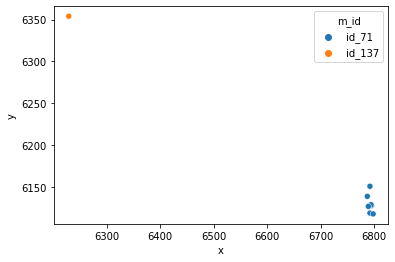

In [12]:
sns.scatterplot(data=mdots[(mdots.group=="MED1-MYC_MEF2D-VHL-G1--11--1-2_2") & (mdots.x> 6000) & abs(mdots.x<6800) & (mdots.y>6000) & (mdots.y<6900)], x="x", y="y", hue="m_id")

## aggregating

In [13]:
mdots = mdots.drop(columns=["parent_id", "id", 'count_red', 'count_green', "filename"])
grouping = {i: "mean" for i in mdots.columns}
grouping.update({
    "image": "first",
    "z": ["mean", "min", "max"],
    'area': ["sum", "min", "max"],
    "class": "unique",
    "group" : "first",
    "exp" : "first",
    "treat" : "first",
    "part" : "first",
    "mean_red" : ["mean", "var"],
    "mean_green" : ["mean", "var"],
    "mean_dapi" :["mean", "var"],
    "pixsum_red" : "sum",
    "pixsum_green" : "sum",
    "pixsum_dapi" : "sum",
    "sum_red" : "sum",
    "sum_green" : "sum",
    "sum_dapi" : "sum",
})
grouping.pop('m_id')

'mean'

In [14]:
# merge into a same sample
groups = mdots.groupby("m_id")
counts = groups['image'].count()
mmdots = groups.agg(grouping)
mmdots['counts'] = counts
mmdots = mmdots[mmdots['counts']>1]
mmdots.columns = [i[0] if "first" in i[1] else '_'.join(i) for i in mmdots.columns]
#rename colors
mmdots['class'] = [i[0] if len(i)==1 else "cobinding" for i in mmdots["class_unique"]]
mmdots = mmdots.drop(columns="class_unique")
mdots = mmdots

In [621]:
mred = fish.colocalize(dots[dots['class']=='red'], distance_scale=1.2)

mred = mred.drop(columns=["parent_id", "id", 'count_red', 'count_green', "filename"])
grouping = {i: "mean" for i in mred.columns}
grouping.update({
    "image": "first",
    "z": ["mean", "min", "max"],
    'area': ["sum", "min", "max"],
    "class": "first",
    "group" : "first",
    "exp" : "first",
    "treat" : "first",
    "part" : "first",
    "mean_red" : ["mean", "var"],
    "mean_green" : ["mean", "var"],
    "mean_dapi" :["mean", "var"],
    "pixsum_red" : "sum",
    "pixsum_green" : "sum",
    "pixsum_dapi" : "sum",
    "sum_red" : "sum",
    "sum_green" : "sum",
    "sum_dapi" : "sum",
})
grouping.pop('m_id')

# merge into a same sample
groups = mred.groupby("m_id")
counts = groups['image'].count()
mred = groups.agg(grouping)
mred['counts'] = counts
mred = mred[mred['counts']>1]
mred.columns = [i[0] if "first" in i[1] else '_'.join(i) for i in mred.columns]

MEF2D-MYC_MEF2D-VHL-G1--5--5-1
MEF2C-MYC_MEF2D-VHL-G1--26--1-3
MEF2D-MEF2C-DMSO-G1--8--2-2_1


/home/jeremie/genepy/genepy/imaging/fish.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdot[mergedidcol]=None
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


MEF2D-MYC_MEF2D-VHL-G1--5--3-1
MEF2D-MEF2C-DMSO-G1--8--3-1
MEF2D-MEF2C-DMSO-G1--8--4-7
MEF2C-MYC_MEF2D-VHL-G1--26--4-2
MED1-MYC_MEF2D-VHL-G1--11--2-2
MEF2C-MYC_MEF2D-DMSO-G1--12--4-4_1
MEF2C-MYC_MEF2D-VHL-G1--28--2-1
MEF2D-MYC_MEF2D-VHL-G1--5--1-1_2
MEF2D-MEF2C-VHL-G1--28--2-1
MED1-MYC_MEF2D-DMSO-G1--13--4-3_2
MED1-MYC_MEF2D-VHL-G1--11--3
MEF2C-MYC_MEF2D-VHL-G1--28--5-3_2
MEF2D-MEF2C-VHL-G1--28--1-1
MEF2C-MYC_MEF2D-VHL-G1--26--3-1
MEF2D-MEF2C-VHL-G1--28--3-1
MEF2D-MYC_MEF2D-DMSO-G1--4--3-1
MEF2D-MEF2C-VHL-G1--28--3-2_1
MEF2D-MEF2C-DMSO-G1--8--2-5
MEF2C-MYC_MEF2D-VHL-G1--28--5-1
MED1-MYC_MEF2D-VHL-G1--11--6-3_2
MEF2C-MYC_MEF2D-DMSO-G1--12--2-1
MEF2D-MEF2C-DMSO-G1--8--4-2
MEF2D-MEF2C-DMSO-G1--8--2-4
MED1-MYC_MEF2D-DMSO-G1--13--3-3
MEF2C-MYC_MEF2D-DMSO-G1--12--4-5_1
MEF2D-MEF2C-VHL-G1--28--4-1
MEF2D-MYC_MEF2D-DMSO-G1--4--3-2_1
MEF2D-MYC_MEF2D-VHL-G1--5--1-1
MED1-MYC_MEF2D-DMSO-G1--13--4-3
MEF2D-MEF2C-DMSO-G1--8--3-3
MEF2D-MYC_MEF2D-VHL-G1--5--2-3
MEF2D-MYC_MEF2D-VHL-G1--5--4-1
MEF2C-MYC_M

KeyError: "['class_unique'] not found in axis"

In [ ]:
#todo: tocode
def aggregate(data, todrop, groupby, countcol, default_agg, optional_agg, mincount):
    cells = cells.drop(columns=["max_red", "max_green", "max_dapi", "mean_red", "mean_green", "mean_dapi", "min_red", "min_green", "min_dapi", "pixsum_red", "pixsum_green", "pixsum_dapi", "range_red", "range_green", "range_dapi", "std_red", "std_green", "std_dapi", "sum_red", "sum_green", "sum_dapi", "sum2_red", "sum2_green", "sum2_dapi", "parent_id", "id", "filename"])

    grouping = {i: "first" for i in cells.columns}
    grouping.update({
        "area": ["sum","min","max"],
        "x": "mean",
        "y": "mean",
        "z": ["max", "min"],
        "count_red": "sum",
        "count_green": "sum",
    })
    groups = cells.groupby('group')
    counts = groups['image'].count()
    mcells = groups.agg(grouping)
    mcells['counts'] = counts
    mcells = mcells[mcells['counts']>1]
    mcells.columns = [i[0] if "first" in i[1] else '_'.join(i) for i in mcells.columns]

In [622]:
cells = cells.drop(columns=["max_red", "max_green", "max_dapi", "mean_red", "mean_green", "mean_dapi", "min_red", "min_green", "min_dapi", "pixsum_red", "pixsum_green", "pixsum_dapi", "range_red", "range_green", "range_dapi", "std_red", "std_green", "std_dapi", "sum_red", "sum_green", "sum_dapi", "sum2_red", "sum2_green", "sum2_dapi", "parent_id", "id"])

grouping = {i: "first" for i in cells.columns}
grouping.update({
    "area": ["sum","min","max"],
    "x": "mean",
    "y": "mean",
    "z": ["max", "min"],
    "count_red": "sum",
    "count_green": "sum",
})
groups = cells.groupby('group')
counts = groups['image'].count()
mcells = groups.agg(grouping)
mcells['counts'] = counts
mcells = mcells[mcells['counts']>1]
mcells.columns = [i[0] if "first" in i[1] else '_'.join(i) for i in mcells.columns]

## compute differences (number/surface/max/min/mean) across cells

### text

In [15]:
# compute difference in signal strength between cells &  between conditions across cells
strength = {}
for k in set(mdots.exp):
    print('\n______________________________')
    print(k)
    for val in ['mean_red_mean', 'mean_green_mean','area_sum']:
        print(val)
        a = []
        for e in ['DMSO', 'VHL']:
            print('\n')
            print(e)
            d = mdots[(mdots.exp==k)&(mdots.treat==e)]
            e = pd.DataFrame([
                [d[d['class']=="cobinding"][val].mean(), d[d['class']=="cobinding"][val].var()**(1/2)],
                [d[d['class']=="green"][val].mean(), d[d['class']=="green"][val].var()**(1/2)],
                [d[d['class']=="red"][val].mean(), d[d['class']=="red"][val].var()**(1/2)]
            ], columns=['mean','var'], index=["obs_cob", "obs_green", "obs_red"])
            print(e)
            a.append(e)
        strength[k] = e
        print("\nchange (VHL/DMSO)\n"+str(a[1]['mean']/a[0]['mean']))


______________________________
MED1-MYC_MEF2D
mean_red_mean


DMSO
                  mean          var
obs_cob    2969.483936  2220.298060
obs_green   922.151343   697.091473
obs_red    3199.799332  2587.583747


VHL
                  mean          var
obs_cob    2387.935750  2273.966305
obs_green   141.909665   155.903655
obs_red    1536.749347   775.165366

change (VHL/DMSO)
obs_cob      0.804159
obs_green    0.153890
obs_red      0.480264
Name: mean, dtype: float64
mean_green_mean


DMSO
                  mean         var
obs_cob    1285.906540  527.145732
obs_green  1620.013106  531.404289
obs_red     144.327917  152.237533


VHL
                  mean         var
obs_cob     836.749311  397.695974
obs_green  1154.770176  473.208979
obs_red     130.175484  195.448553

change (VHL/DMSO)
obs_cob      0.650708
obs_green    0.712815
obs_red      0.901943
Name: mean, dtype: float64
area_sum


DMSO
                    mean            var
obs_cob    831385.375000  942257.985881
obs_green

In [80]:
# compute difference in number/surface/max/min/mean(val) of green /red across cells and cobindings
data = {}
typ = [("sum_green_sum", "green"), ('sum_red_sum', "red"), ("area_sum", "size")]
for k in set(mdots.exp):
    a = []
    print(k)
    print('______________________________\n')
    at = pd.DataFrame()
    
    for t in ['DMSO', 'VHL']:
        print(t)
        d = mdots[(mdots.exp==k)&(mdots.treat==t)]
        
        a = pd.DataFrame()
        b = pd.DataFrame()
        print("\ncount greens per cell:")
        e = [len(d[(d["group"]==cell)&(d['class']=="green")]) for cell in set(d.group)]
        print(min(e))
        print(np.mean(e), np.sqrt(np.var(e)))
        
        b["color"] = ['on green']*len(e)
        b['signal'] = e
        a = a.append(b)
        
        b = pd.DataFrame()
        e = [len(d[(d["group"]==cell)&(d['class']=="red")]) for cell in set(d.group)]
        b["color"] = ['on red']*len(e)
        b['signal'] = e
        a = a.append(b)
        
        b = pd.DataFrame()
        e = [len(d[(d["group"]==cell)&(d['class']=="cobinding")]) for cell in set(d.group)]
        b["color"] = ['on coloc']*len(e)
        b['signal'] = e
        a = a.append(b)
        
        a['type'] = "counts"
        a['cond'] = t
        at = at.append(a)
        
        for (col,name) in typ:
            print(name)
            a = pd.DataFrame()
            print('\nsignal in green:')
            e = d[d['class']=="green"][col].tolist()
            print(np.mean(e), np.sqrt(np.var(e)))
            b = pd.DataFrame()
            b['signal'] = e
            b['color'] = "on green"
            a = a.append(b)
            
            print('\nsignal in red:')
            e = d[d['class']=="red"][col].tolist()
            print(np.mean(e), np.sqrt(np.var(e)))
            
            b = pd.DataFrame()
            b['signal'] =  e
            b['color'] = "on red"
            a = a.append(b)

            print('\nsignal in cobinding:')
            e = d[d['class']=="cobinding"][col].tolist()
            print(np.mean(e), np.sqrt(np.var(e)))
            
            b = pd.DataFrame()
            b['signal'] = e
            b['color'] = "on coloc"           
            print('\n\n')
            a = a.append(b)
            a['type']=name
            a['cond'] = t
            at = at.append(a)
        print('____________\n')
    data[k] = at.reset_index(drop=True)

MED1-MYC_MEF2D
______________________________

DMSO

count greens per cell:
219
316.38461538461536 86.21175938131238
green

signal in green:
562057.052759543 840082.4976909771

signal in red:
109317.65789473684 303173.29851385154

signal in cobinding:
983188.125 1044106.1455036777



red

signal in green:
293002.4035983467 463363.55462031794

signal in red:
3261910.98245614 8513827.390269868

signal in cobinding:
4174068.625 8145362.589224265



size

signal in green:
267010.9784828592 284787.9332270166

signal in red:
451744.98245614034 812688.963558932

signal in cobinding:
831385.375 927418.3500224478



____________

VHL

count greens per cell:
80
314.962962962963 155.94668639835945
green

signal in green:
364240.47836312326 513729.18645123893

signal in red:
67138.09146341463 158767.45171268322

signal in cobinding:
1097998.794117647 849634.360374293



red

signal in green:
36181.95519755409 50332.99726464253

signal in red:
1226818.1463414633 2719969.5705849454

signal in cobind

In [81]:
# adding chi2
for k,val in data.items():
    for i in set(val['type']):
        e = " |"
        for u in ['on green', "on red", "on coloc"]:#set(val['color']):
            a = val[(val['type'] == i) & (val['color'] == u) & (val['cond'] == "DMSO")]["signal"].tolist()
            b = val[(val['type'] == i) & (val['color'] == u) & (val['cond'] == "VHL")]["signal"].tolist()
            r = ttest_ind(a, b, equal_var=False)
            e+= u + ": ("f"{np.mean(a)/np.mean(b):.1f}, "f"{r[1]:.1e}), "
        val.loc[val[val['type'] == i].index, 'type'] = i + e +"|"
    data[k] = val

### plots

In [88]:
l

'green |on green: (1.5, 6.4e-74), on red: (1.6, 1.8e-01), on coloc: (0.9, 6.3e-01), |'

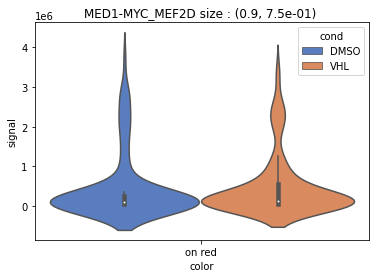

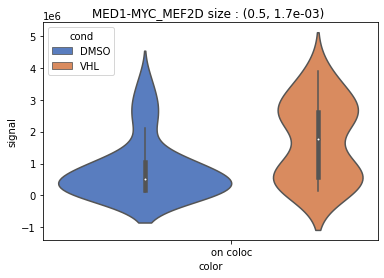

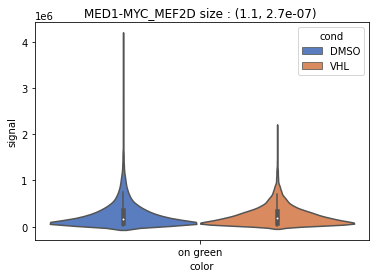

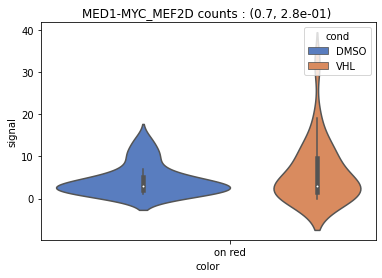

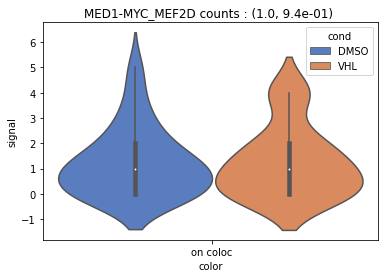

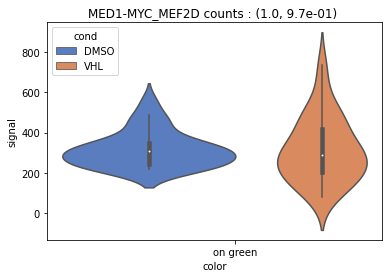

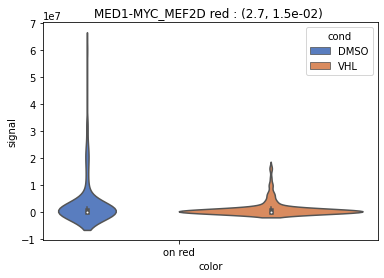

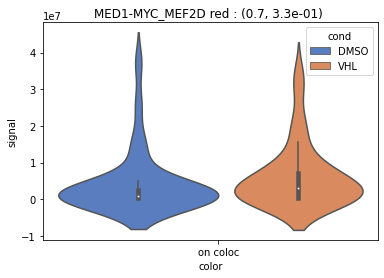

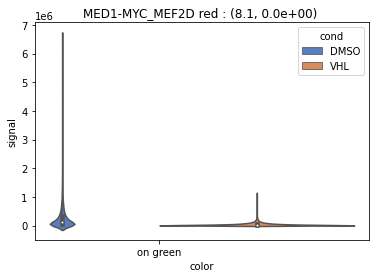

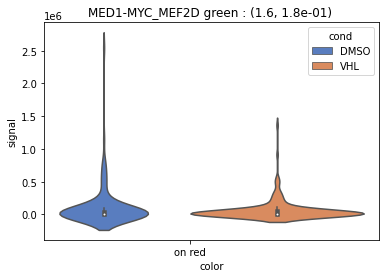

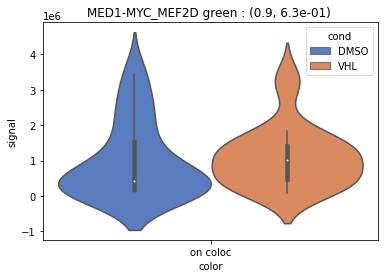

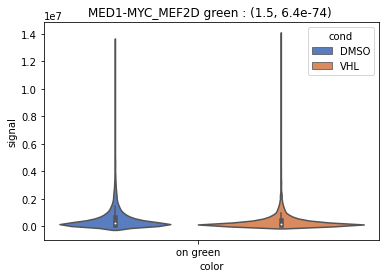

In [90]:
for k, v in data.items():
    for l in set(v['type']):
        for m in set(v['color']):
            sns.violinplot(data = v[(v['type']==l)&(v['color']==m)], x="color", y="signal", hue="cond", palette="muted")
            plt.title(k+" "+l.split('|')[0]+""+l.split(m)[-1].split('),')[0]+") ")
            plt.show()

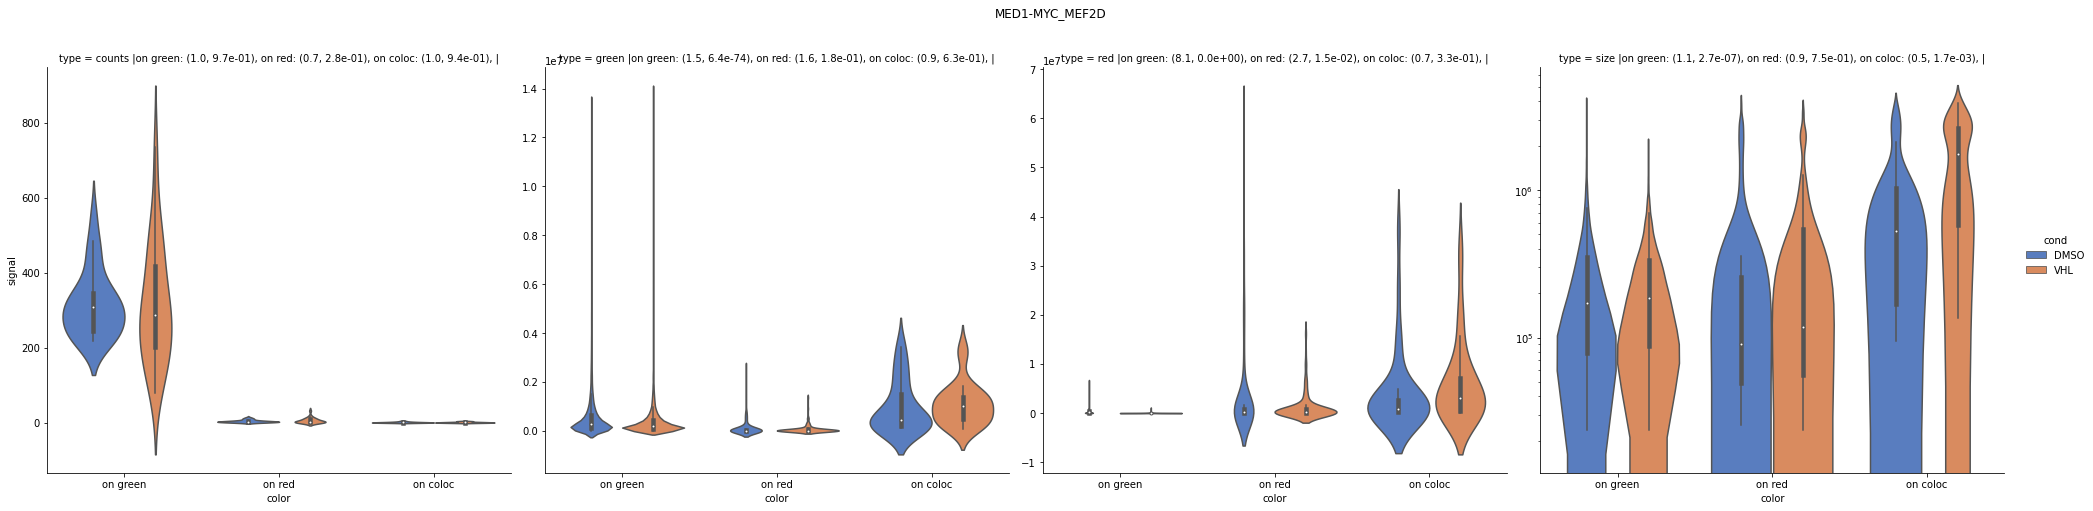

In [91]:
for k, val in data.items():
    g = sns.catplot(kind="violin", x="color", y="signal", hue="cond", col="type", data=val, palette="muted", sharey=False, height=7)
    g.fig.subplots_adjust(top=0.86)
    g.fig.suptitle(k)
    plt.yscale('log')
    plt.show()

## likelyhood of coloc compared to expectation for each experiment &  between conditions

### text

In [92]:
# compute dot likelyhood of coloc compared to expectation for each experiment &  between conditions
enrichment = {}

for k in set(mdots.exp):
    count = []
    fisher = []
    print('______________________________')
    print(k)
    for e in ['DMSO', 'VHL']:
        d = mdots[(mdots.exp==k)&(mdots.treat==e)]
        allredcount = len(d[d['class']!="green"])
        try:
            obs_cob = len(d[d['class']=="cobinding"])/allredcount
        except ZeroDivisionError:
            print('no red dot')
            continue
        obs_green = d[d['class']=="green"].area_sum.sum() * call_scale
        pred_cob = obs_green / mcells[(mcells.exp==k)&(mcells.treat==e)].area_sum.sum()
        #print(obs_cob, obs_green, pred_cob)
        count.append(obs_cob/pred_cob)
        print(e+": "+str(obs_cob/pred_cob))
        a = pred_cob*allredcount
        b = obs_cob*allredcount
        f = fisher_exact(np.array([[b, allredcount - b], [a, allredcount - a]], dtype=int))
        if f[0] is np.inf:
            f = (obs_cob/pred_cob, f[1])
        fisher.append(f)
    enrichment[k] = fisher
    print("change: "+str(count[1]/count[0]))

______________________________
MED1-MYC_MEF2D


NameError: name 'mcells' is not defined

In [628]:
enrichment

{'MEF2D-MYC_MEF2D': [(9.295838849369968, 0.12108368652871485),
  (57.997523967051634, 1.0)],
 'MED1-MYC_MEF2D': [(13.286549707602338, 8.526742357856943e-08),
  (13.40650406504065, 3.3548918227858856e-08)],
 'MEF2D-MEF2C': [(13.765392619663977, 8.900704667190583e-71),
  (11.80540436395164, 1.3076621379695384e-86)],
 'MEF2C-MYC_MEF2D': [(21.880783168647376, 0.24117647058823483), (nan, 1.0)]}

### plot

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text major ticklabel objects>)

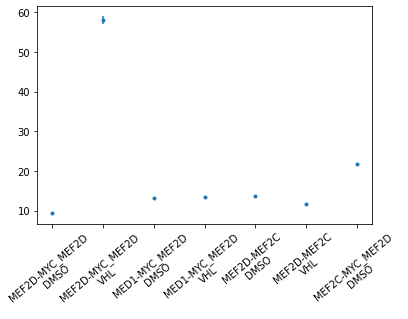

In [631]:
x=[]
y=[]
e=[]
for k, val in enrichment.items():
    x.append(k+'\nDMSO')
    y.append(val[0][0])
    e.append(val[0][1])
    x.append(k+'\nVHL')
    y.append(val[1][0])
    e.append(val[1][1])
plt.errorbar(x, y, e, linestyle='None', marker='.')
plt.xticks(rotation = 40) # Rotates X-Axis Ticks by 45-degrees

## plot of averaged binned signal by distance from focis

In [ ]:
# make a plot of averaged binned signal strength by distance from locis
dists= {}
newdists = {}
for val in set(mdots.exp):
    for e in ['DMSO', 'VHL']:
        d = dots[(dots.exp==val)&(dots.treat==e)]
        dist = np.array([])
        weight = np.array([])
        newdist = pd.DataFrame()
        m = mred[(mred.exp==val)&(mred.treat==e)]
        print(val, e)
        for k, v in m.iterrows():
            dist = np.append(dist, distance_matrix(d[d['class']=="green"][['x', "y", "z"]].values, np.array([v[['x_mean', "y_mean", "z_mean"]]])).T[0].astype(float))
            weight = np.append(weight, d[d['class'] == "green"]["sum_green"])
            
            a = d[d['class']=="green"][['x',"y","z"]] - v[['x_mean', "y_mean", "z_mean"]].values
            a["sum_green"] =  d[d['class']=="green"]["sum_green"]
            newdist = newdist.append(a)
        newdists[val+e] = newdist
        dists[val+e] = [dist, weight]

MEF2D-MYC_MEF2D DMSO
MEF2D-MYC_MEF2D VHL
MED1-MYC_MEF2D DMSO
MED1-MYC_MEF2D VHL
MEF2D-MEF2C DMSO


In [583]:
mdots[(mdots['class']=="cobinding")&(mdots.exp=="MEF2D-MYC_MEF2D")&(mdots.treat=="VHL")]

,image,area_sum,area_min,area_max,x_mean,y_mean,z_mean,z_min,z_max,max_red_mean,...,sum_dapi_sum,sum2_red_mean,sum2_green_mean,sum2_dapi_mean,group,exp,treat,part,counts_,class
m_id,,,,,,,,,,,,,,,,,,,,,
id_22289,5,439960,26456,94067,6244.714286,7464.571429,2635.0,2380,2890,3636.428571,...,984226.0,3.083944e+08,1.292393e+07,4.905123e+08,MEF2D-MYC_MEF2D-VHL-G1--5--1-4_1,MEF2D-MYC_MEF2D,VHL,1-4_1,7,cobinding


In [571]:
v = dists['MEF2D-MYC_MEF2DVHL']

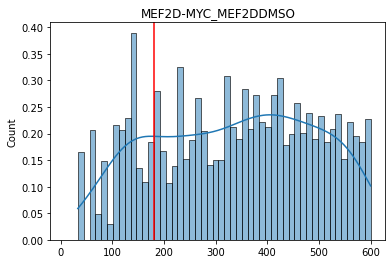

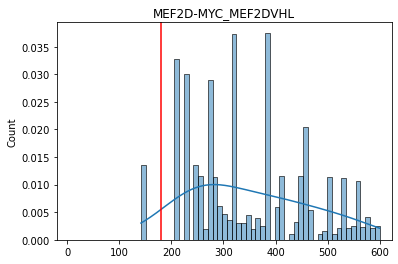

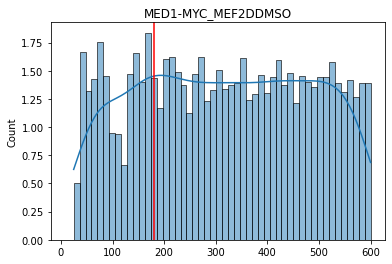

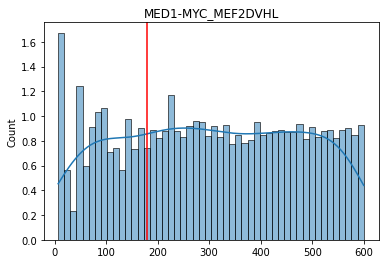

In [602]:
size=600
bins = 50
defa = size/bins
for k, v in dists.items():
    plt.title(k)
    ax = sns.histplot(x=v[0][v[0]<size], weights=v[1][v[0]<size]/((4*3.14*(defa+v[0][v[0]<size]))**2), kde=True, bins=bins, fill=True)
    plt.axvline(x=180, color="red")
    ax.set(xlim=(-20,None))
    plt.show()

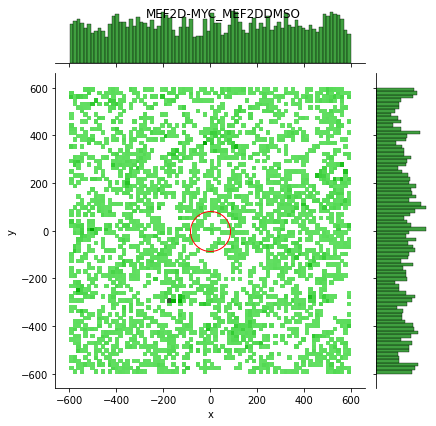

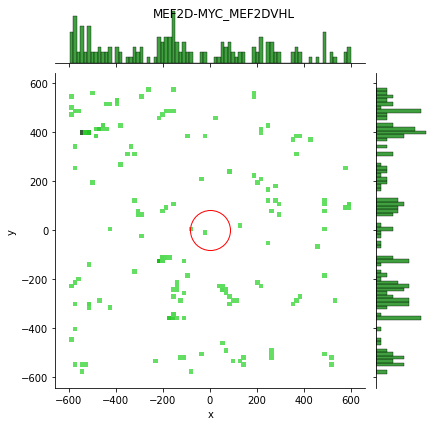

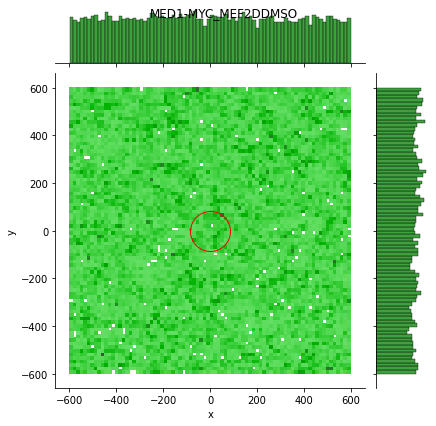

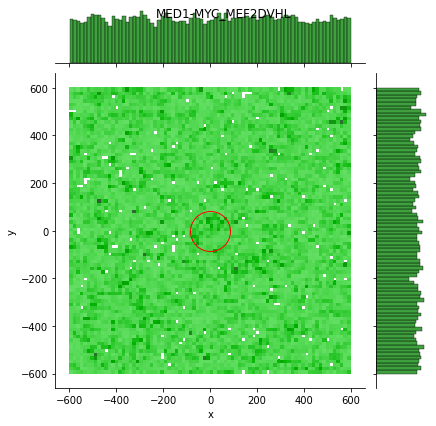

In [608]:
size=600
bins=80
s = 40
for k, v in newdists.items():
    p = sns.jointplot(data=v[(abs(v.x)<size) & (abs(v.y)<size) & (abs(v.z)<size)], x="x", y="y",  kind="hist", weights=v[(abs(v.x)<size) & (abs(v.y)<size)& (abs(v.z)<size)].sum_green, bins=bins, marginal_kws=dict(bins=bins), color="green", kde=True)
    # gridsize=50, kind="hex", marginal_kws=dict(bins=50))
    # hue="sum_green_sum")
    x_values = [0]#, 2, 3, 4]
    y_values = [0]#, 0, 0, 0]
    p.ax_joint.plot(x_values, y_values, 'o', ms=s, markerfacecolor="None",
         markeredgecolor='red', markeredgewidth=1)
    p.fig.suptitle(k)
    plt.show()

In [ ]:
# apply plot to old data from juliana    

In [ ]:
# make a nice fake plot
sns.plot()